## Logistcs Regression

- Logistics Regression is Supervised machine learning algorthm use for the prediction of classes or catgorical entity.It mainly use for the Decision making purposes.
- Logistics Regression is Regression because in that we have to predict the dependent variable which is in the form of classes i.e yes,no or 0 or 1 with the help of the independednt variable.
- It works like a classification because it handle the classes in the dependent variable.
- Logistics helps to take decision on the basis of the Probablitry.
- It uses the Sigmoid Function which is helps to maintaiin probablity inbetween 0 and 1.In that it will gives the probablity inbetween 0 and 1 in respect of the input variable which is form of categories on and the independent variable.It means it helps to map the probablities inbetween  the 0 and 1 according the independent features.
- Sigmoid funtion uses the Threshold which help logistics to take decision suppose we having the threshold =0.5 and our output probablity is 0.9 then it will map it to 1 and shows that this case belongs to 1.
- Similarly if we got the 0.4 then it map to 0 and suggest us to maintain that case as 0.
    - **Simoid function helps to map the Prediction into probablity inbetween 0 and 1.**

## Apply Logistics Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.shape

(41188, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
dataframe = pd.DataFrame({'Dtye':data.dtypes,'Unique':data.nunique(),'Duplicated':data.duplicated().sum()})

In [10]:
dataframe

,Dtye,Unique,Duplicated
age,int64,78,12
job,object,12,12
marital,object,4,12
education,object,8,12
default,object,3,12
housing,object,3,12
loan,object,3,12
contact,object,2,12
month,object,10,12
day_of_week,object,5,12


### EDA

In [11]:
data['job'].value_counts().sort_values(ascending=False).head()

admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: job, dtype: int64

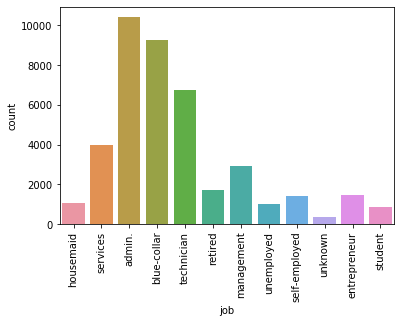

In [12]:
sns.countplot(data['job'])
plt.xticks(rotation=90)
plt.show()

In [13]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

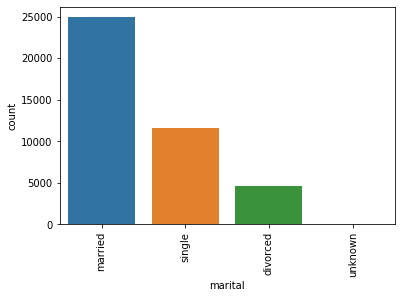

In [14]:
sns.countplot(data['marital'])
plt.xticks(rotation=90)
plt.show()

In [15]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

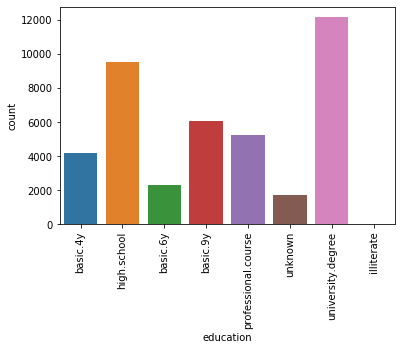

In [16]:
sns.countplot(data['education'])
plt.xticks(rotation=90)
plt.show()

In [17]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

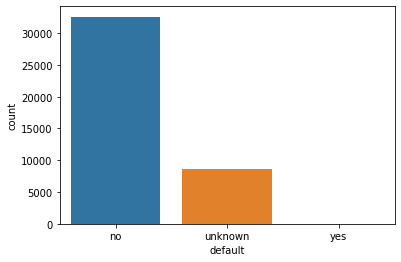

In [18]:
sns.countplot(data['default'])
plt.show()

In [19]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

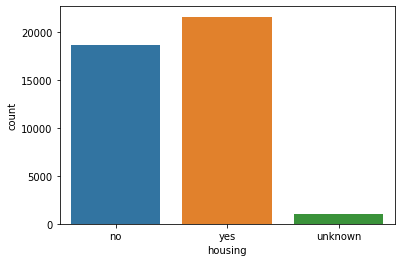

In [20]:
sns.countplot(data['housing'])
plt.show()

In [21]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

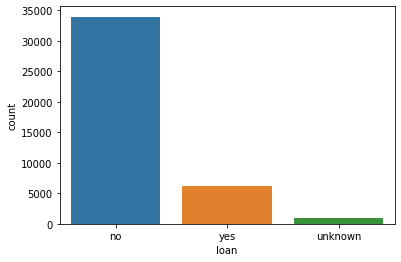

In [22]:
sns.countplot(data['loan'])
plt.show()

In [23]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

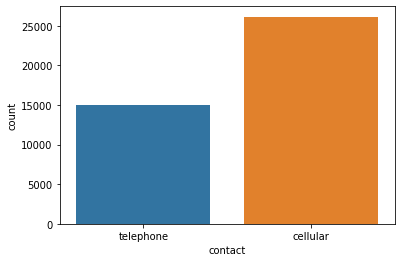

In [24]:
sns.countplot(data['contact'])
plt.show()

In [25]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

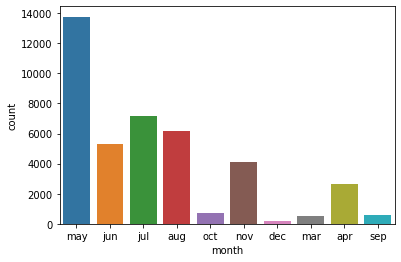

In [26]:
sns.countplot(data['month'])
plt.show()

In [27]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

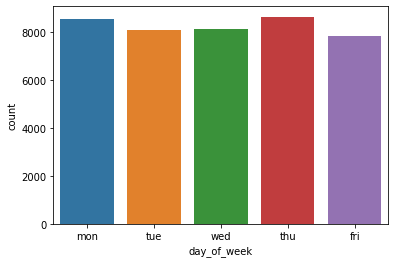

In [28]:
sns.countplot(data['day_of_week'])
plt.show()

In [29]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

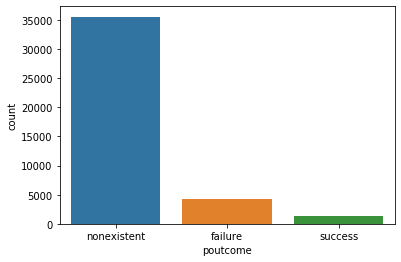

In [30]:
sns.countplot(data['poutcome'])
plt.show()

In [31]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

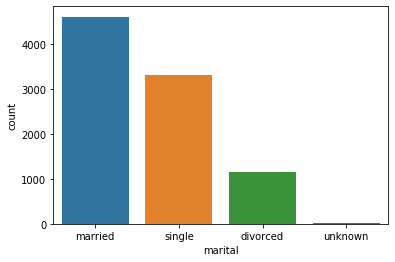

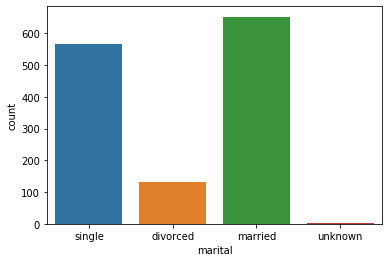

In [32]:
sns.countplot(data[((data['job']=='admin.') & (data['y']=='no'))]['marital'])
plt.show()
sns.countplot(data[((data['job']=='admin.') & (data['y']=='yes'))]['marital'])
plt.show()

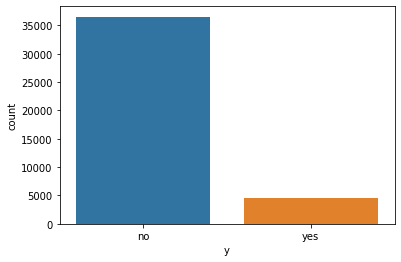

In [33]:
sns.countplot(data['y'])
plt.show()

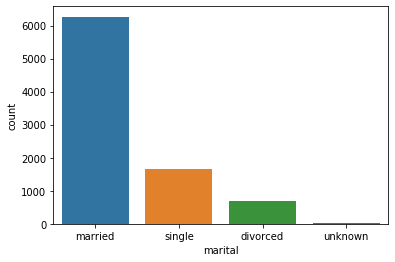

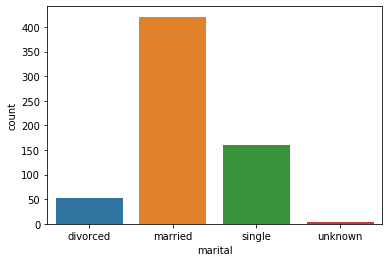

In [34]:
sns.countplot(data[((data['job']=='blue-collar') & (data['y']=='no'))]['marital'])
plt.show()
sns.countplot(data[((data['job']=='blue-collar') & (data['y']=='yes'))]['marital'])
plt.show()

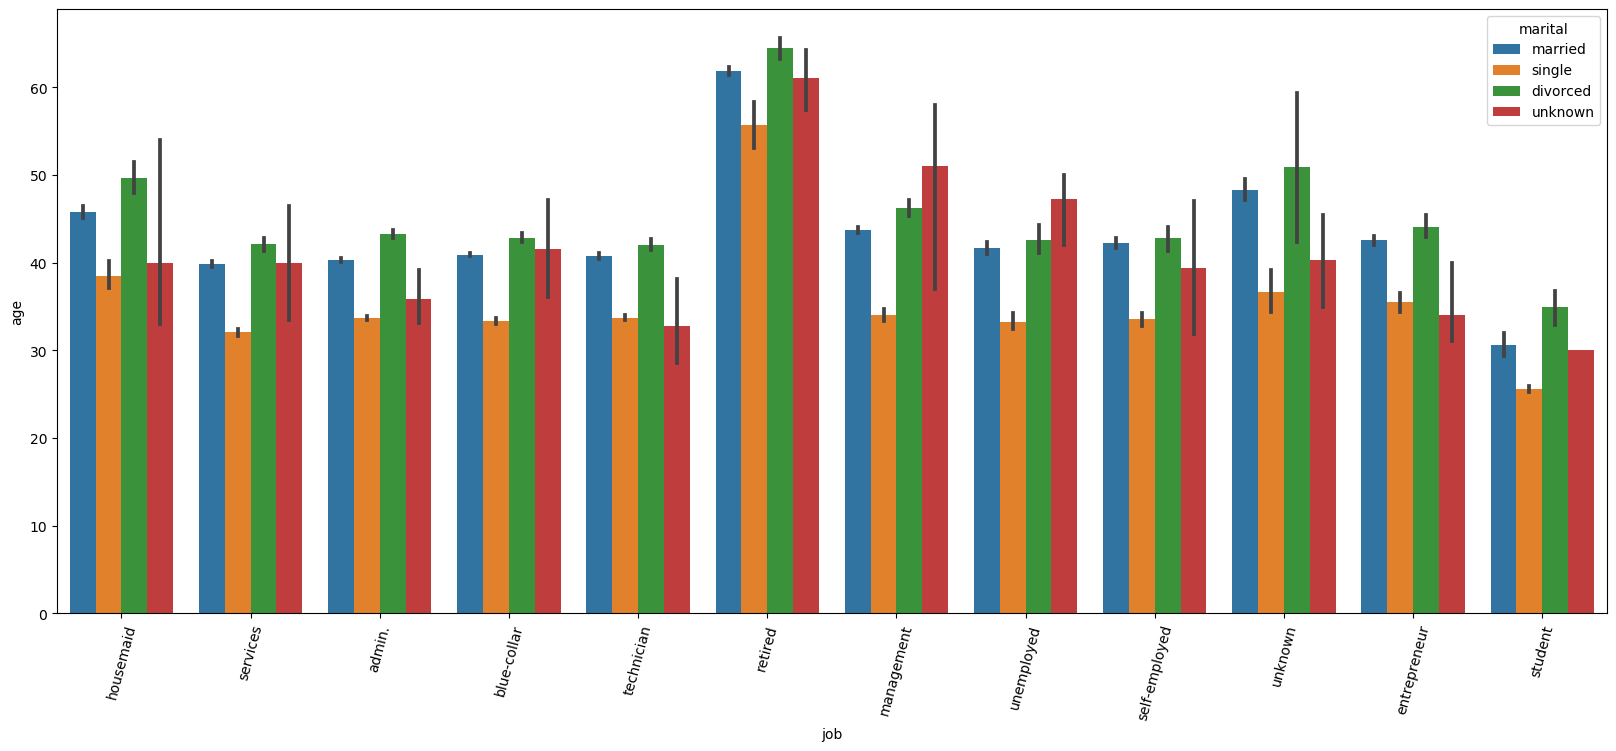

In [35]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['job'],y=data['age'],hue=data['marital'])
plt.xticks(rotation=75)
plt.show()

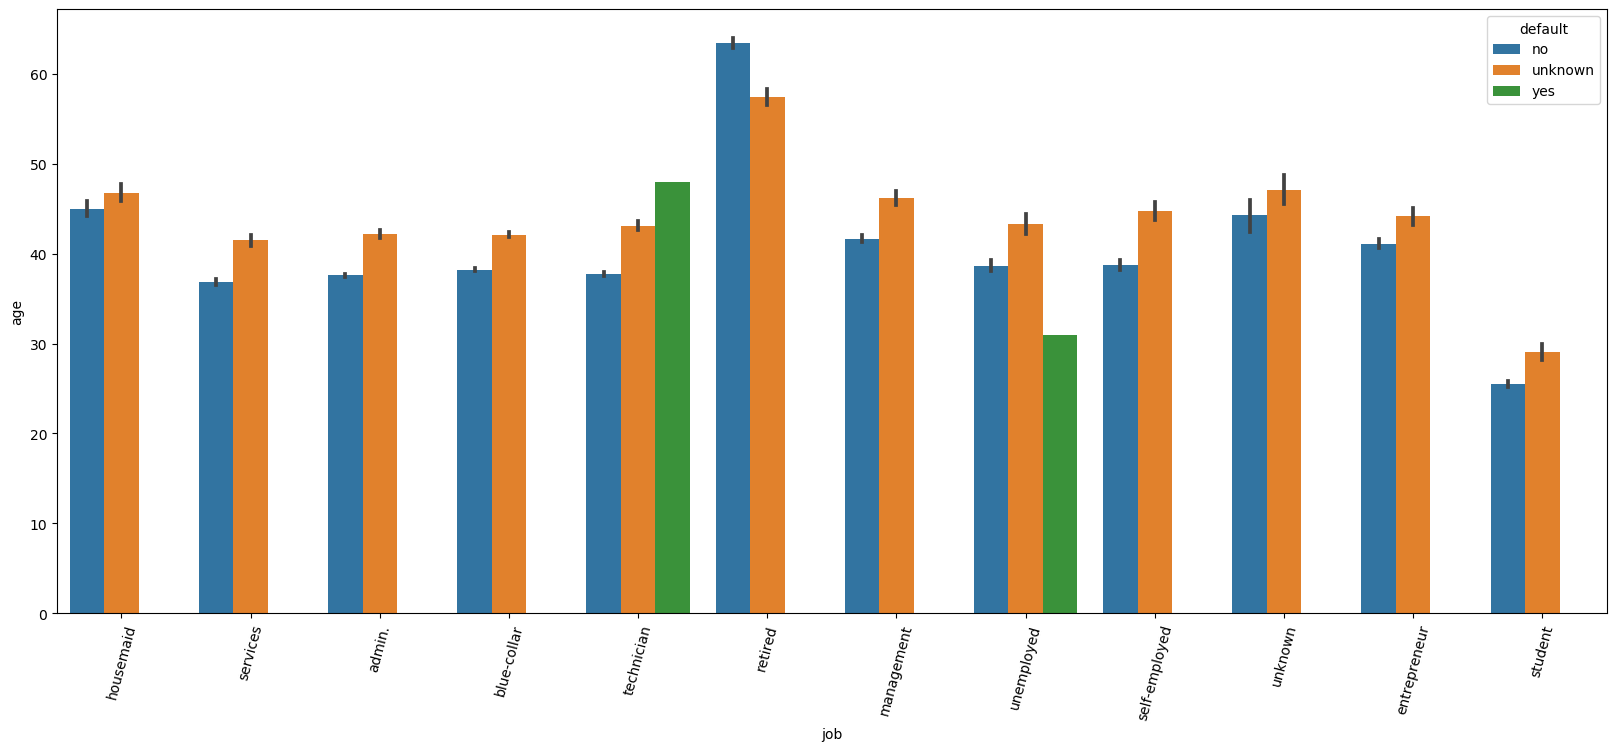

In [36]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['job'],y=data['age'],hue=data['default'])
plt.xticks(rotation=75)
plt.show()

<Figure size 1080x432 with 0 Axes>

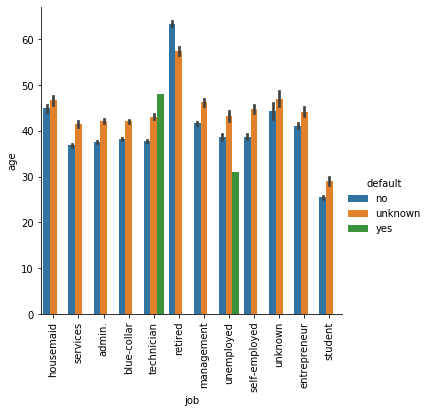

In [37]:
plt.figure(figsize=(15,6))
sns.catplot(x='job',y='age',kind='bar',hue='default',data=data)
plt.xticks(rotation=90)
plt.show()

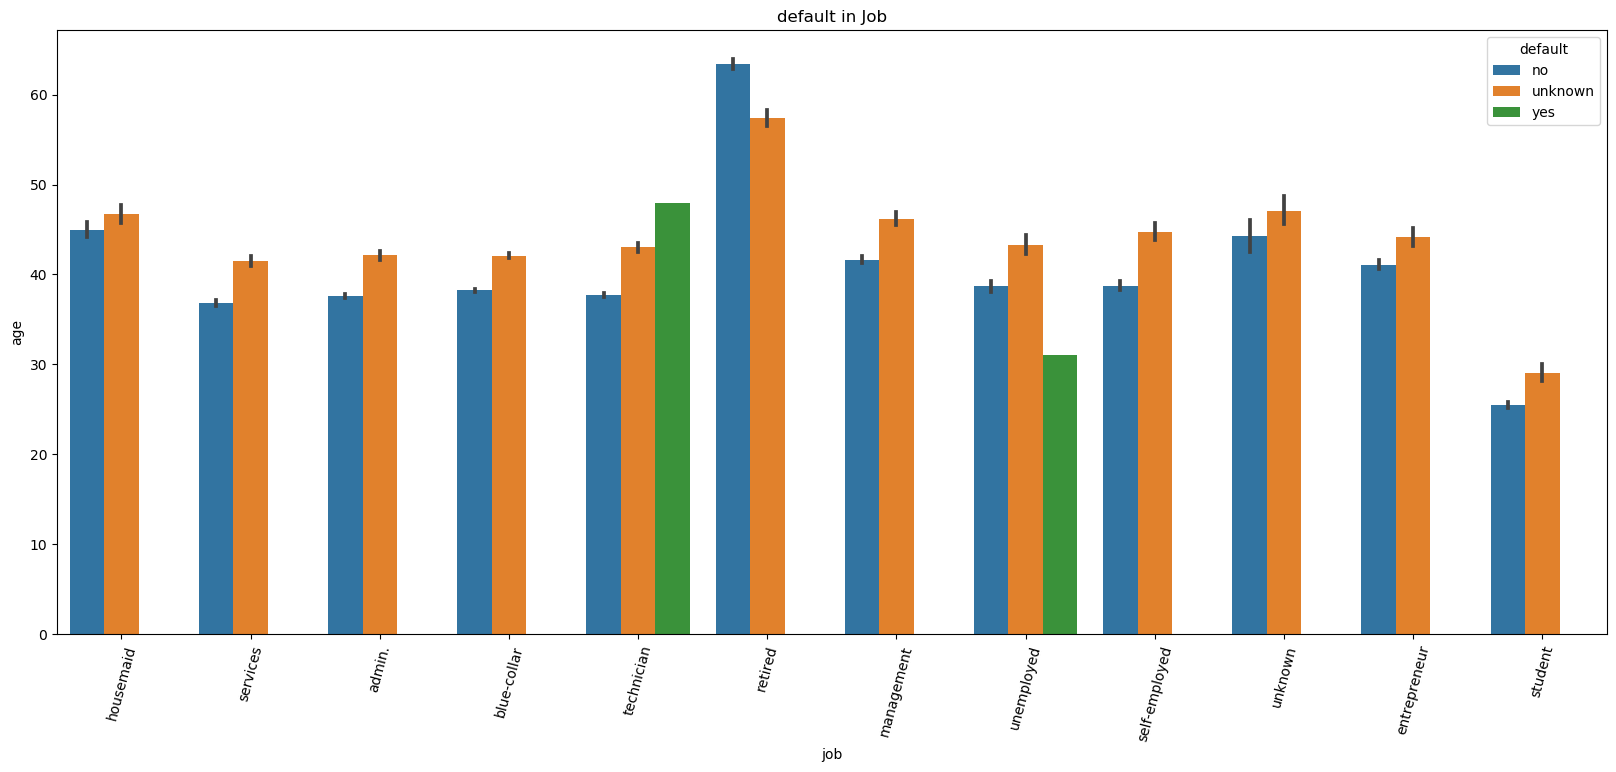

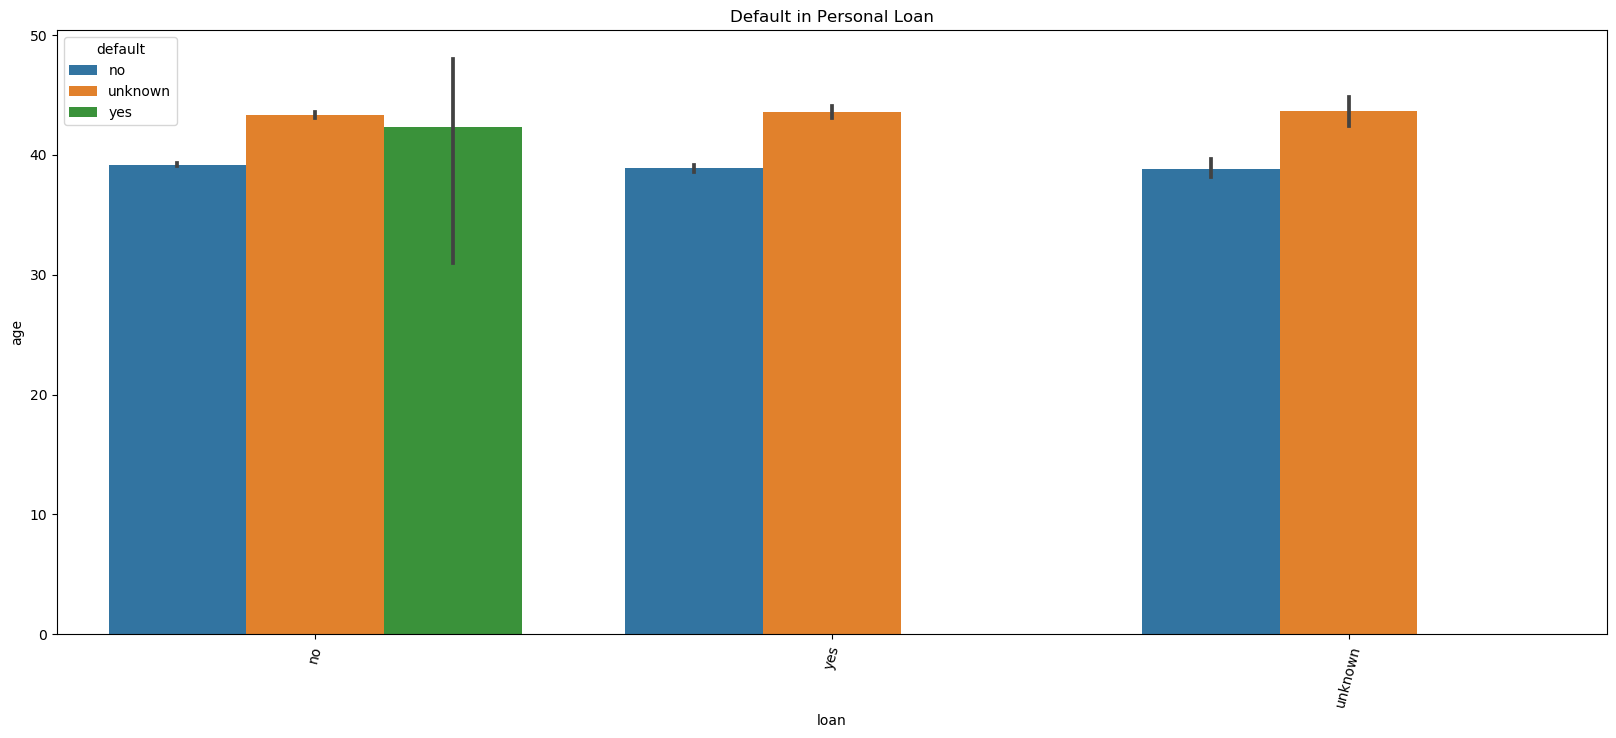

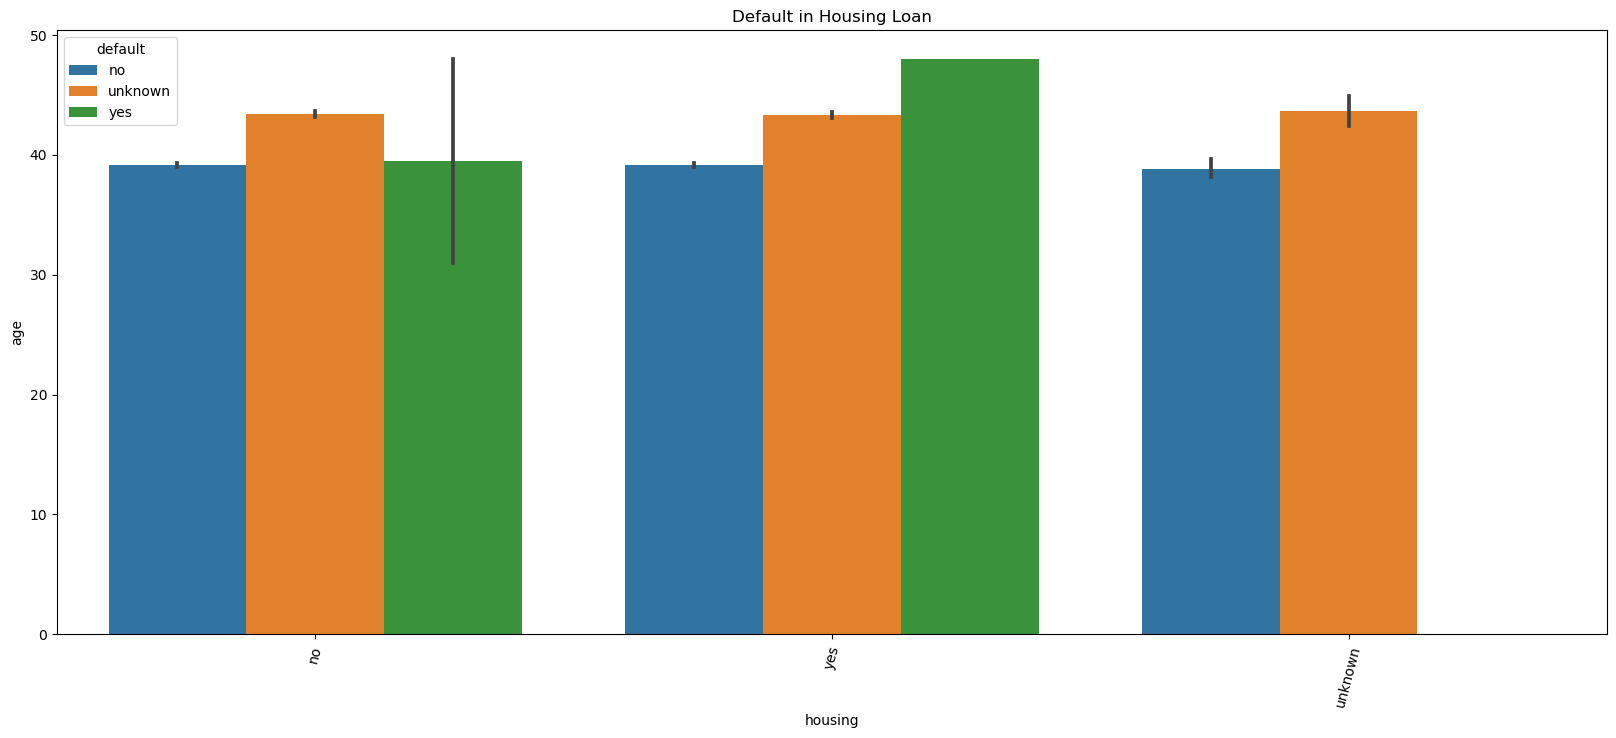

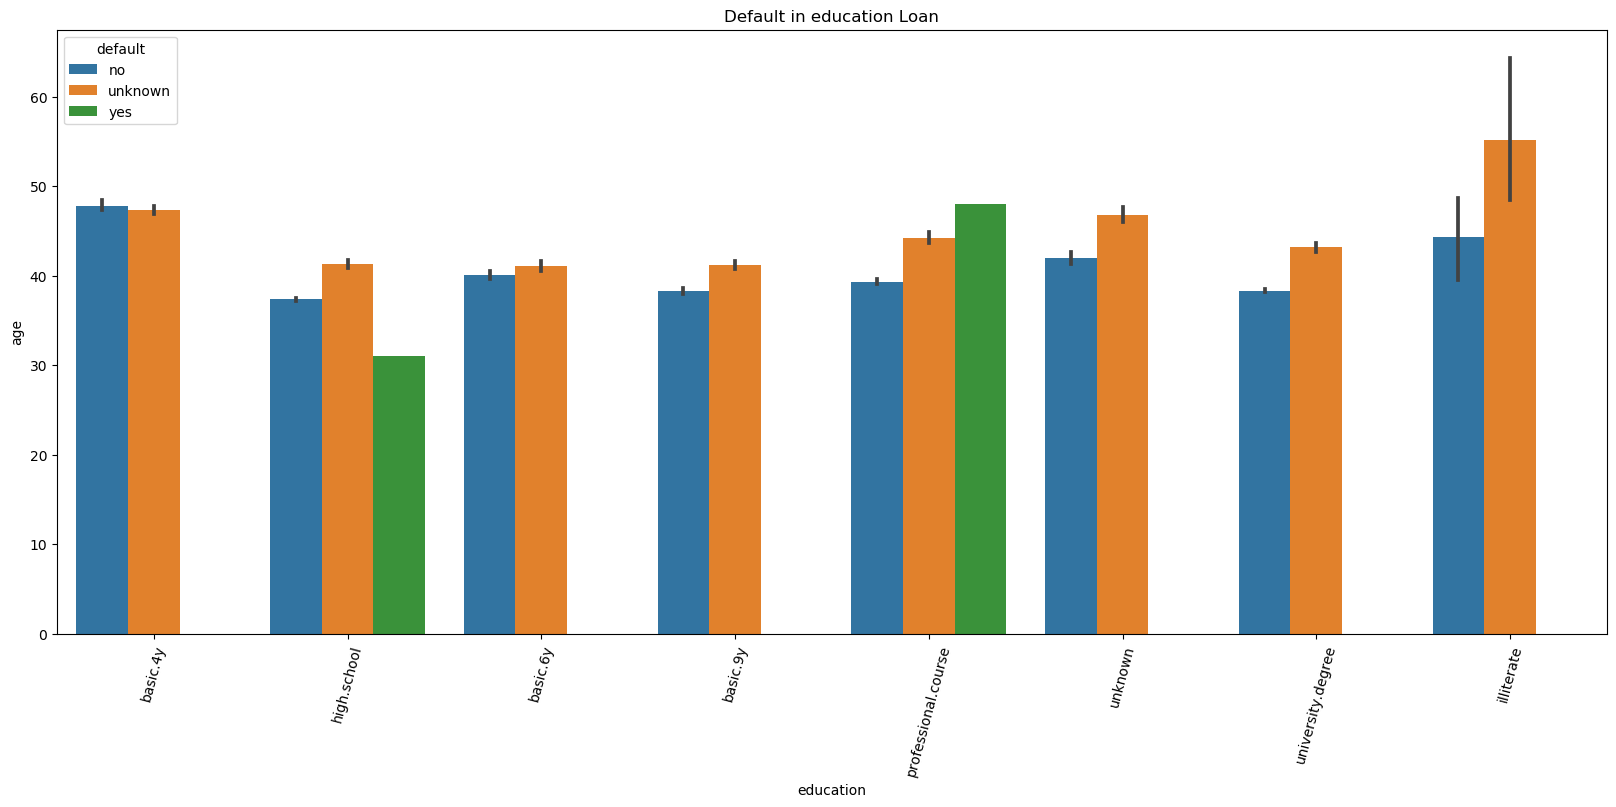

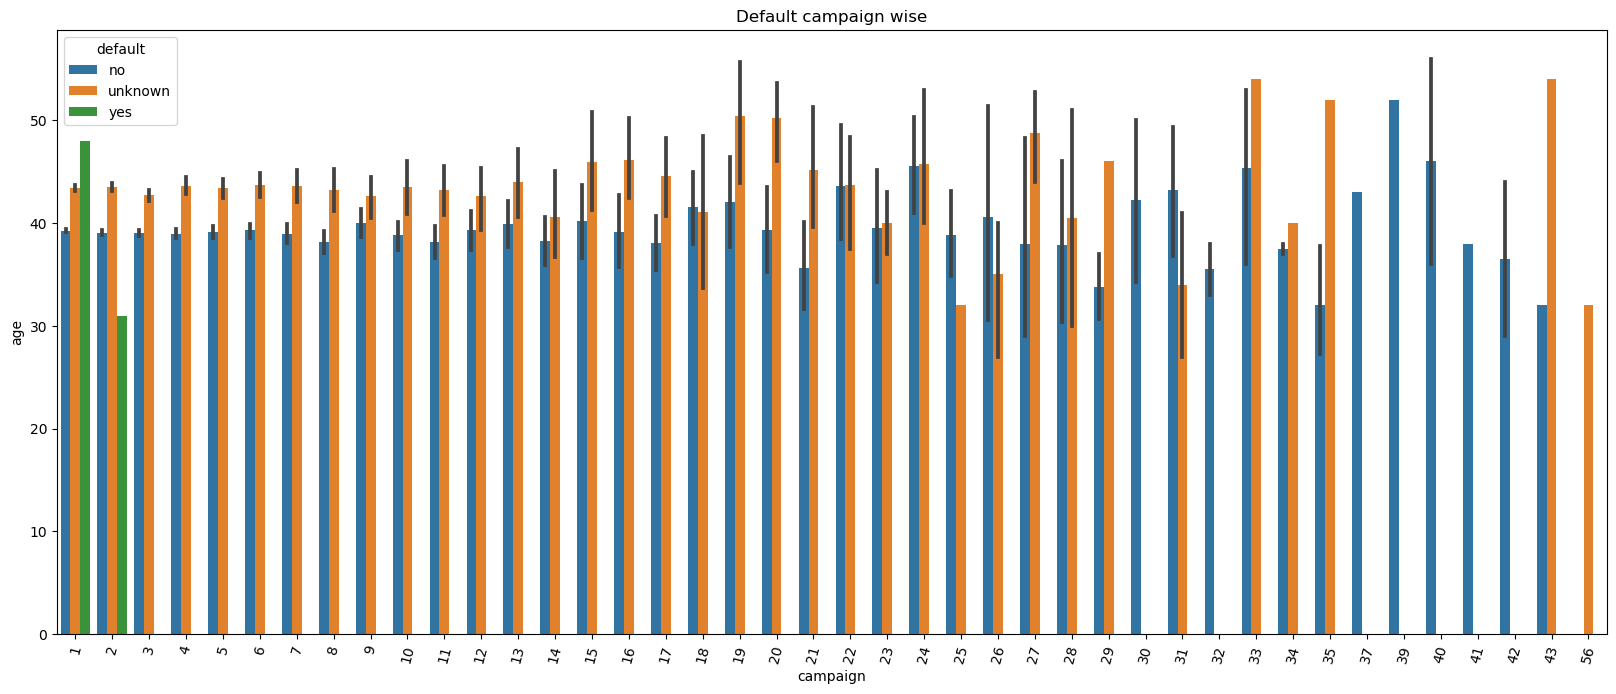

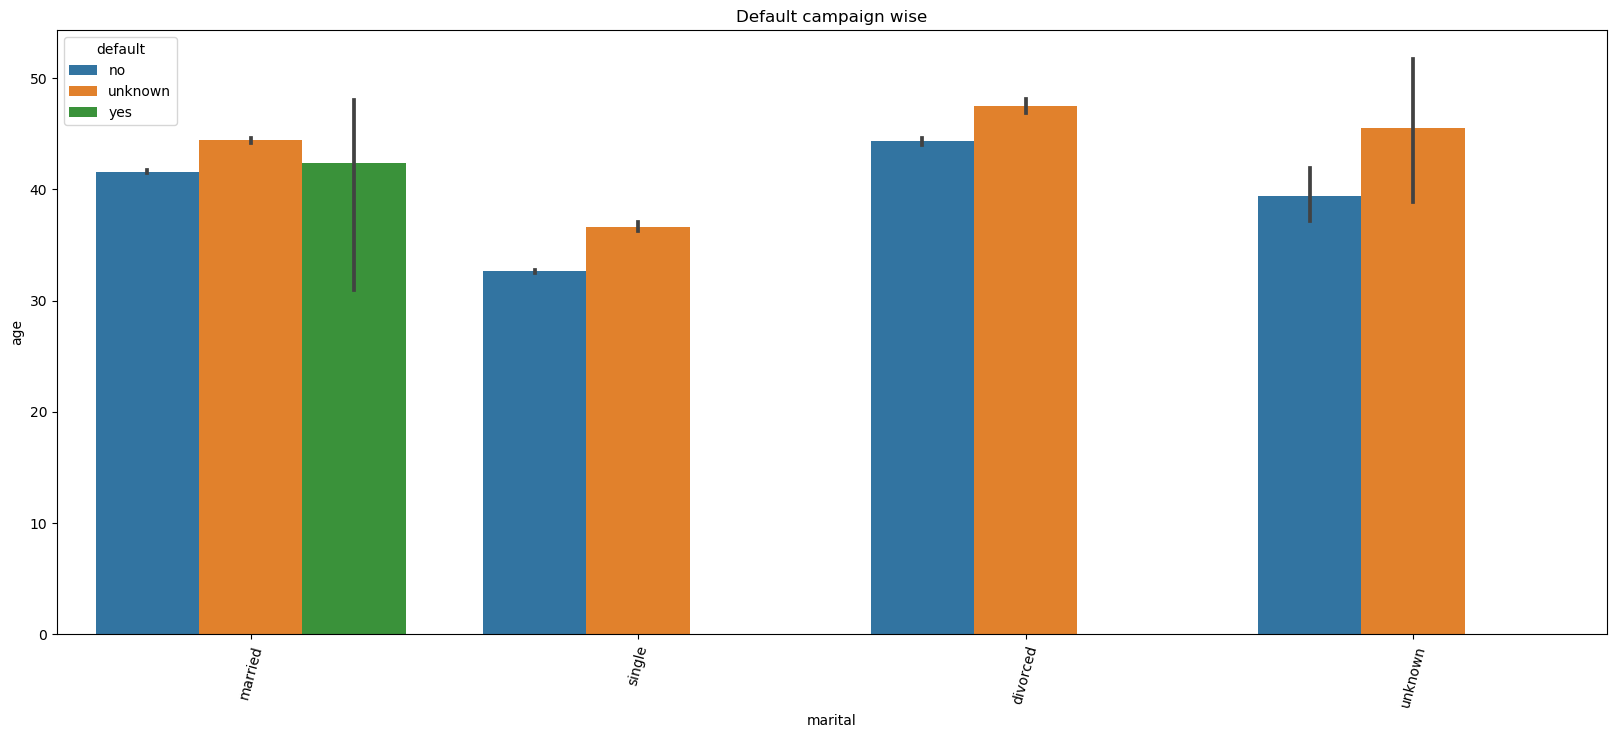

In [38]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['job'],y=data['age'],hue=data['default'])
plt.title('default in Job')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['loan'],y=data['age'],hue=data['default'])
plt.title('Default in Personal Loan')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['housing'],y=data['age'],hue=data['default'])
plt.title('Default in Housing Loan')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['education'],y=data['age'],hue=data['default'])
plt.title('Default in education Loan')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['campaign'],y=data['age'],hue=data['default'])
plt.title('Default campaign wise')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=data['marital'],y=data['age'],hue=data['default'])
plt.title('Default campaign wise')
plt.xticks(rotation=75)
plt.show()

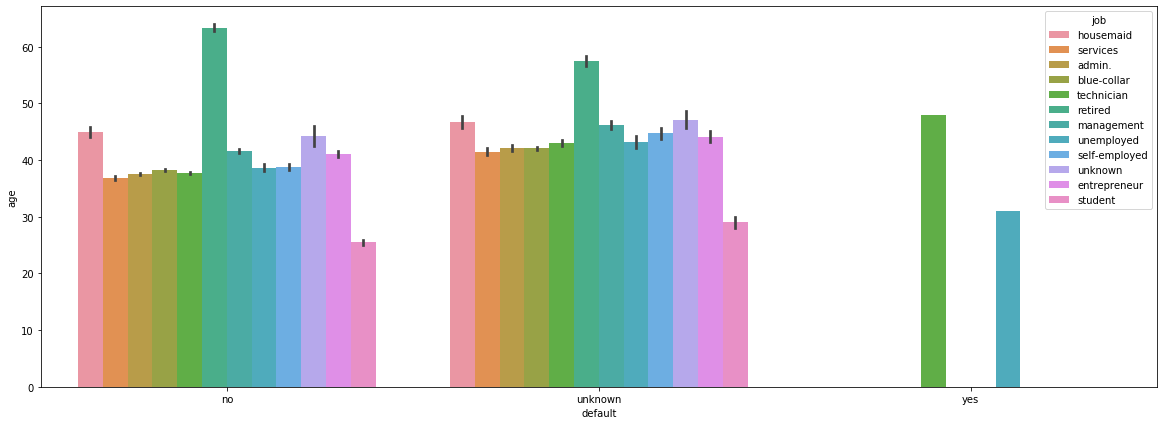

In [39]:
plt.figure(figsize=(20,7))
sns.barplot(data['default'],data['age'],hue=data['job'])
plt.show()

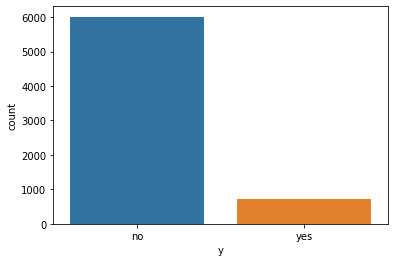

In [40]:
sns.countplot(data[data['job']=='technician']['y'])
plt.show()

In [41]:
data[data['job']=='technician']['y'].value_counts()

no     6013
yes     730
Name: y, dtype: int64

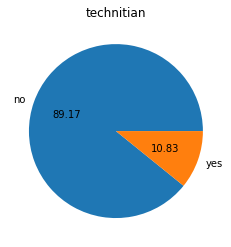

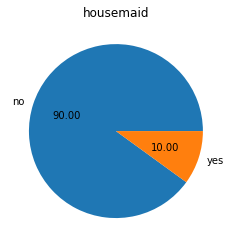

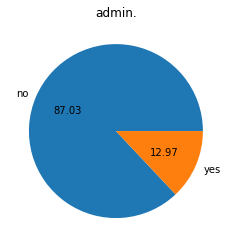

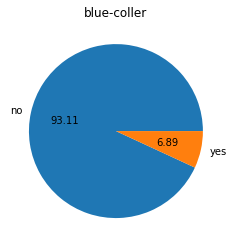

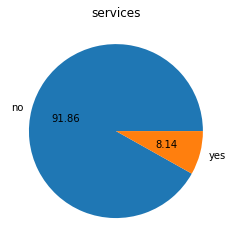

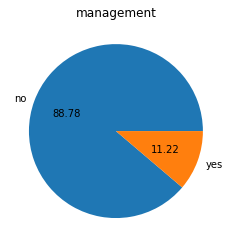

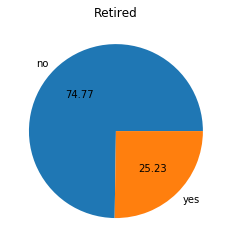

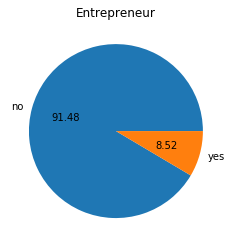

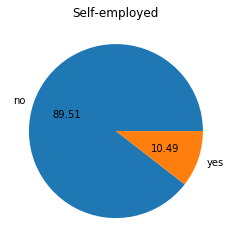

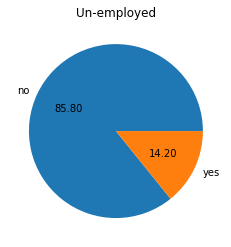

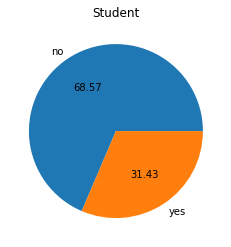

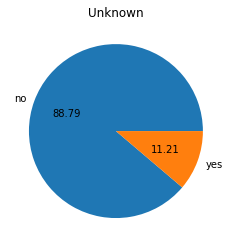

In [42]:
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='technician']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('technitian')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='housemaid']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('housemaid')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='admin.']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('admin.')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='blue-collar']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('blue-coller')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='services']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('services')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='management']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('management')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='retired']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Retired')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='entrepreneur']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Entrepreneur')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='self-employed']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Self-employed')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='unemployed']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Un-employed')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='student']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Student')
plt.show()
label= ['no','yes']
autopct='%.2f'
plt.pie(data[data['job']=='unknown']['y'].value_counts(),labels=label,autopct=autopct)
plt.title('Unknown')
plt.show()

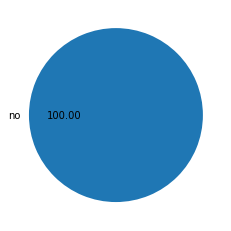

In [43]:
label= ['no']
autopct='%.2f'
plt.pie(data[data['default']=='yes']['y'].value_counts(),labels=label,autopct=autopct)
plt.show()

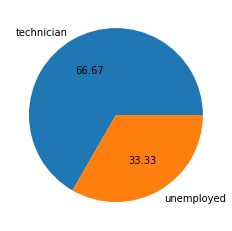

In [44]:
label= ['technician','unemployed']
autopct='%.2f'
plt.pie(data[data['default']=='yes']['job'].value_counts(),labels=label,autopct=autopct)
plt.show()

In [45]:
data[((data['job']=='technician') & (data['y']=='no'))]['marital'].value_counts()

married     3286
single      2008
divorced     709
unknown       10
Name: marital, dtype: int64

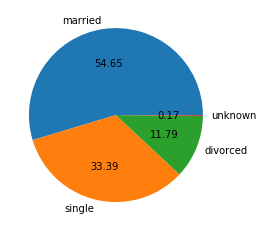

In [46]:
label= ['married','single','divorced','unknown']
autopct='%.2f'
plt.pie(data[((data['job']=='technician') & (data['y']=='no'))]['marital'].value_counts(),labels=label,autopct=autopct)
plt.show()

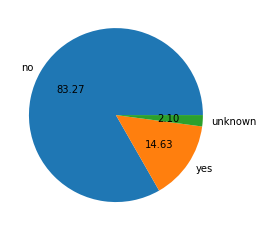

In [47]:
label= ['no','yes','unknown']
autopct='%.2f'
plt.pie(data[((data['job']=='technician') & (data['y']=='no'))]['loan'].value_counts(),labels=label,autopct=autopct)
plt.show()

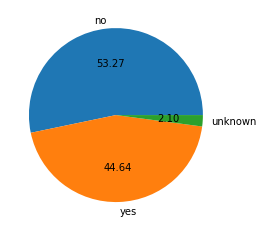

In [48]:
label= ['no','yes','unknown']
autopct='%.2f'
plt.pie(data[((data['job']=='technician') & (data['y']=='no'))]['housing'].value_counts(),labels=label,autopct=autopct)
plt.show()

In [49]:
dataframe

,Dtye,Unique,Duplicated
age,int64,78,12
job,object,12,12
marital,object,4,12
education,object,8,12
default,object,3,12
housing,object,3,12
loan,object,3,12
contact,object,2,12
month,object,10,12
day_of_week,object,5,12


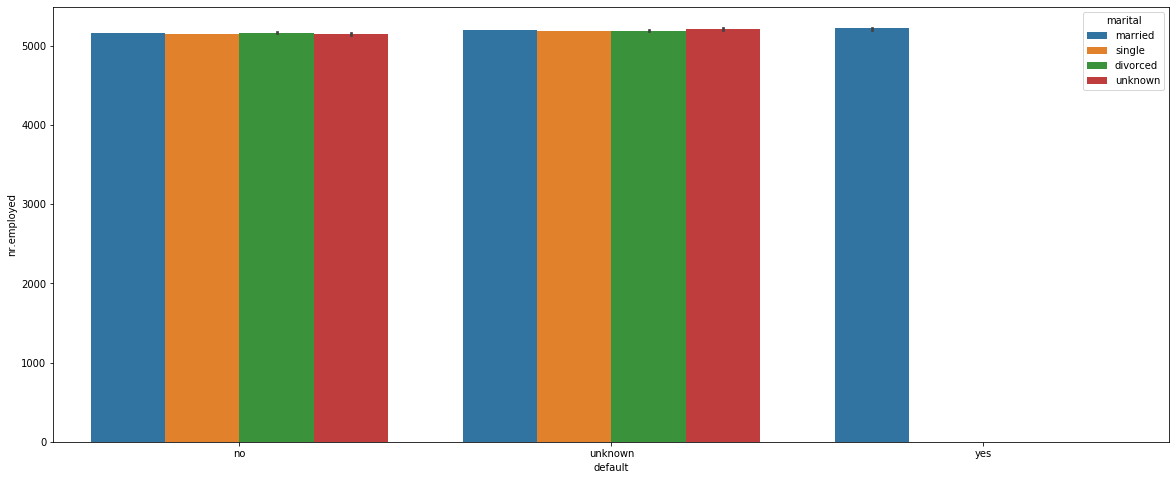

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(y=data['nr.employed'],x =data['default'],hue=data['marital'])
plt.show()

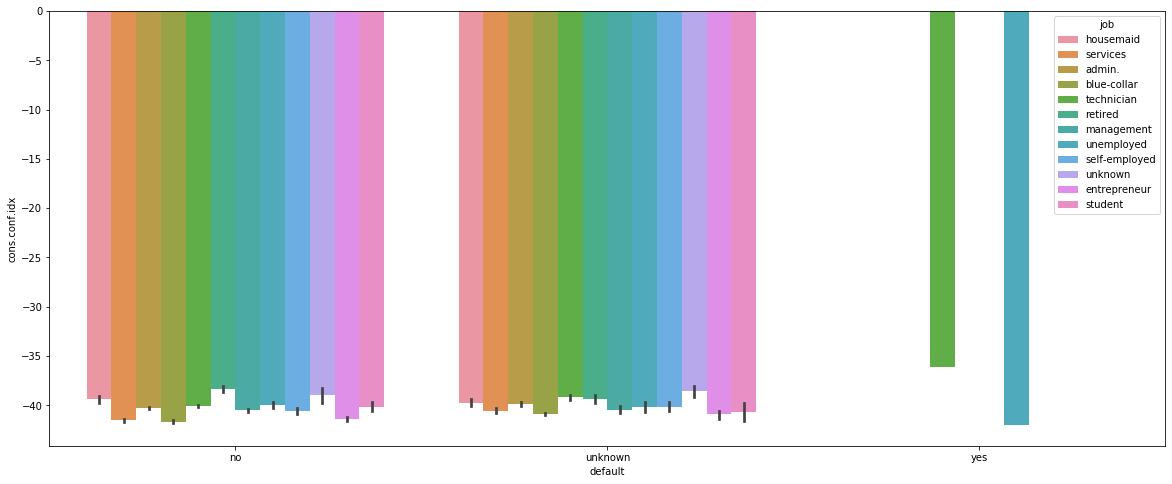

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(y=data['cons.conf.idx'],x =data['default'],hue=data['job'])
plt.show()

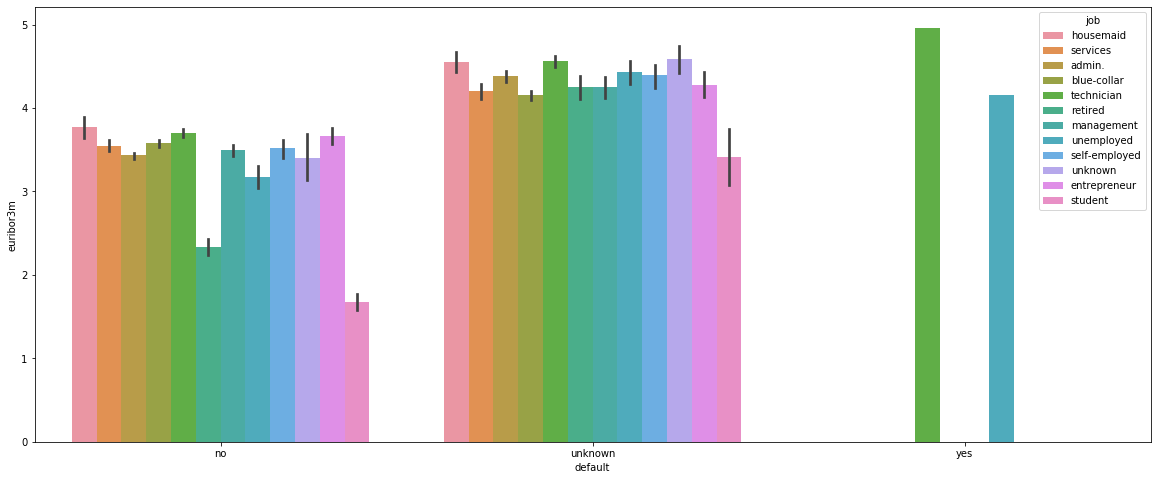

In [52]:
plt.figure(figsize=(20,8))
sns.barplot(y=data['euribor3m'],x =data['default'],hue=data['job'])
plt.show()

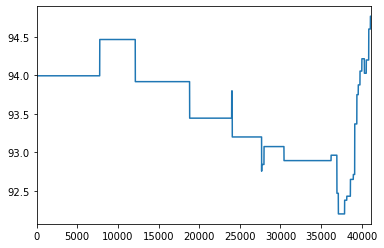

In [53]:
data['cons.price.idx'].plot()

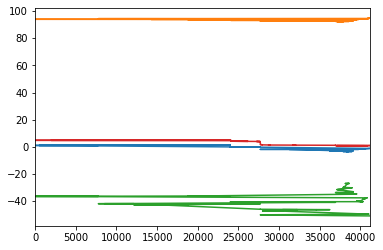

In [54]:
data['emp.var.rate'].sort_values(ascending=False).plot()
data['cons.price.idx'].sort_values(ascending=False).plot()
data['cons.conf.idx'].sort_values(ascending=False).plot()
data['euribor3m'].sort_values(ascending=False).plot()
plt.show()

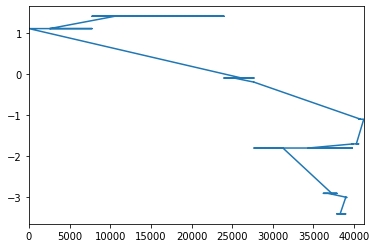

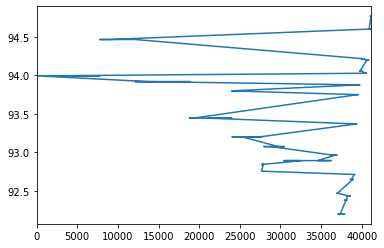

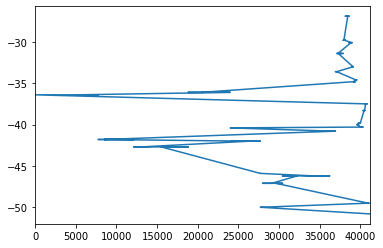

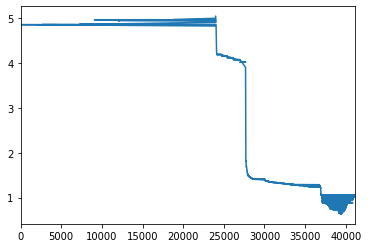

In [55]:
data['emp.var.rate'].sort_values(ascending=False).plot()
plt.show()
data['cons.price.idx'].sort_values(ascending=False).plot()
plt.show()
data['cons.conf.idx'].sort_values(ascending=False).plot()
plt.show()
data['euribor3m'].sort_values(ascending=False).plot()
plt.show()

<Figure size 1296x648 with 0 Axes>

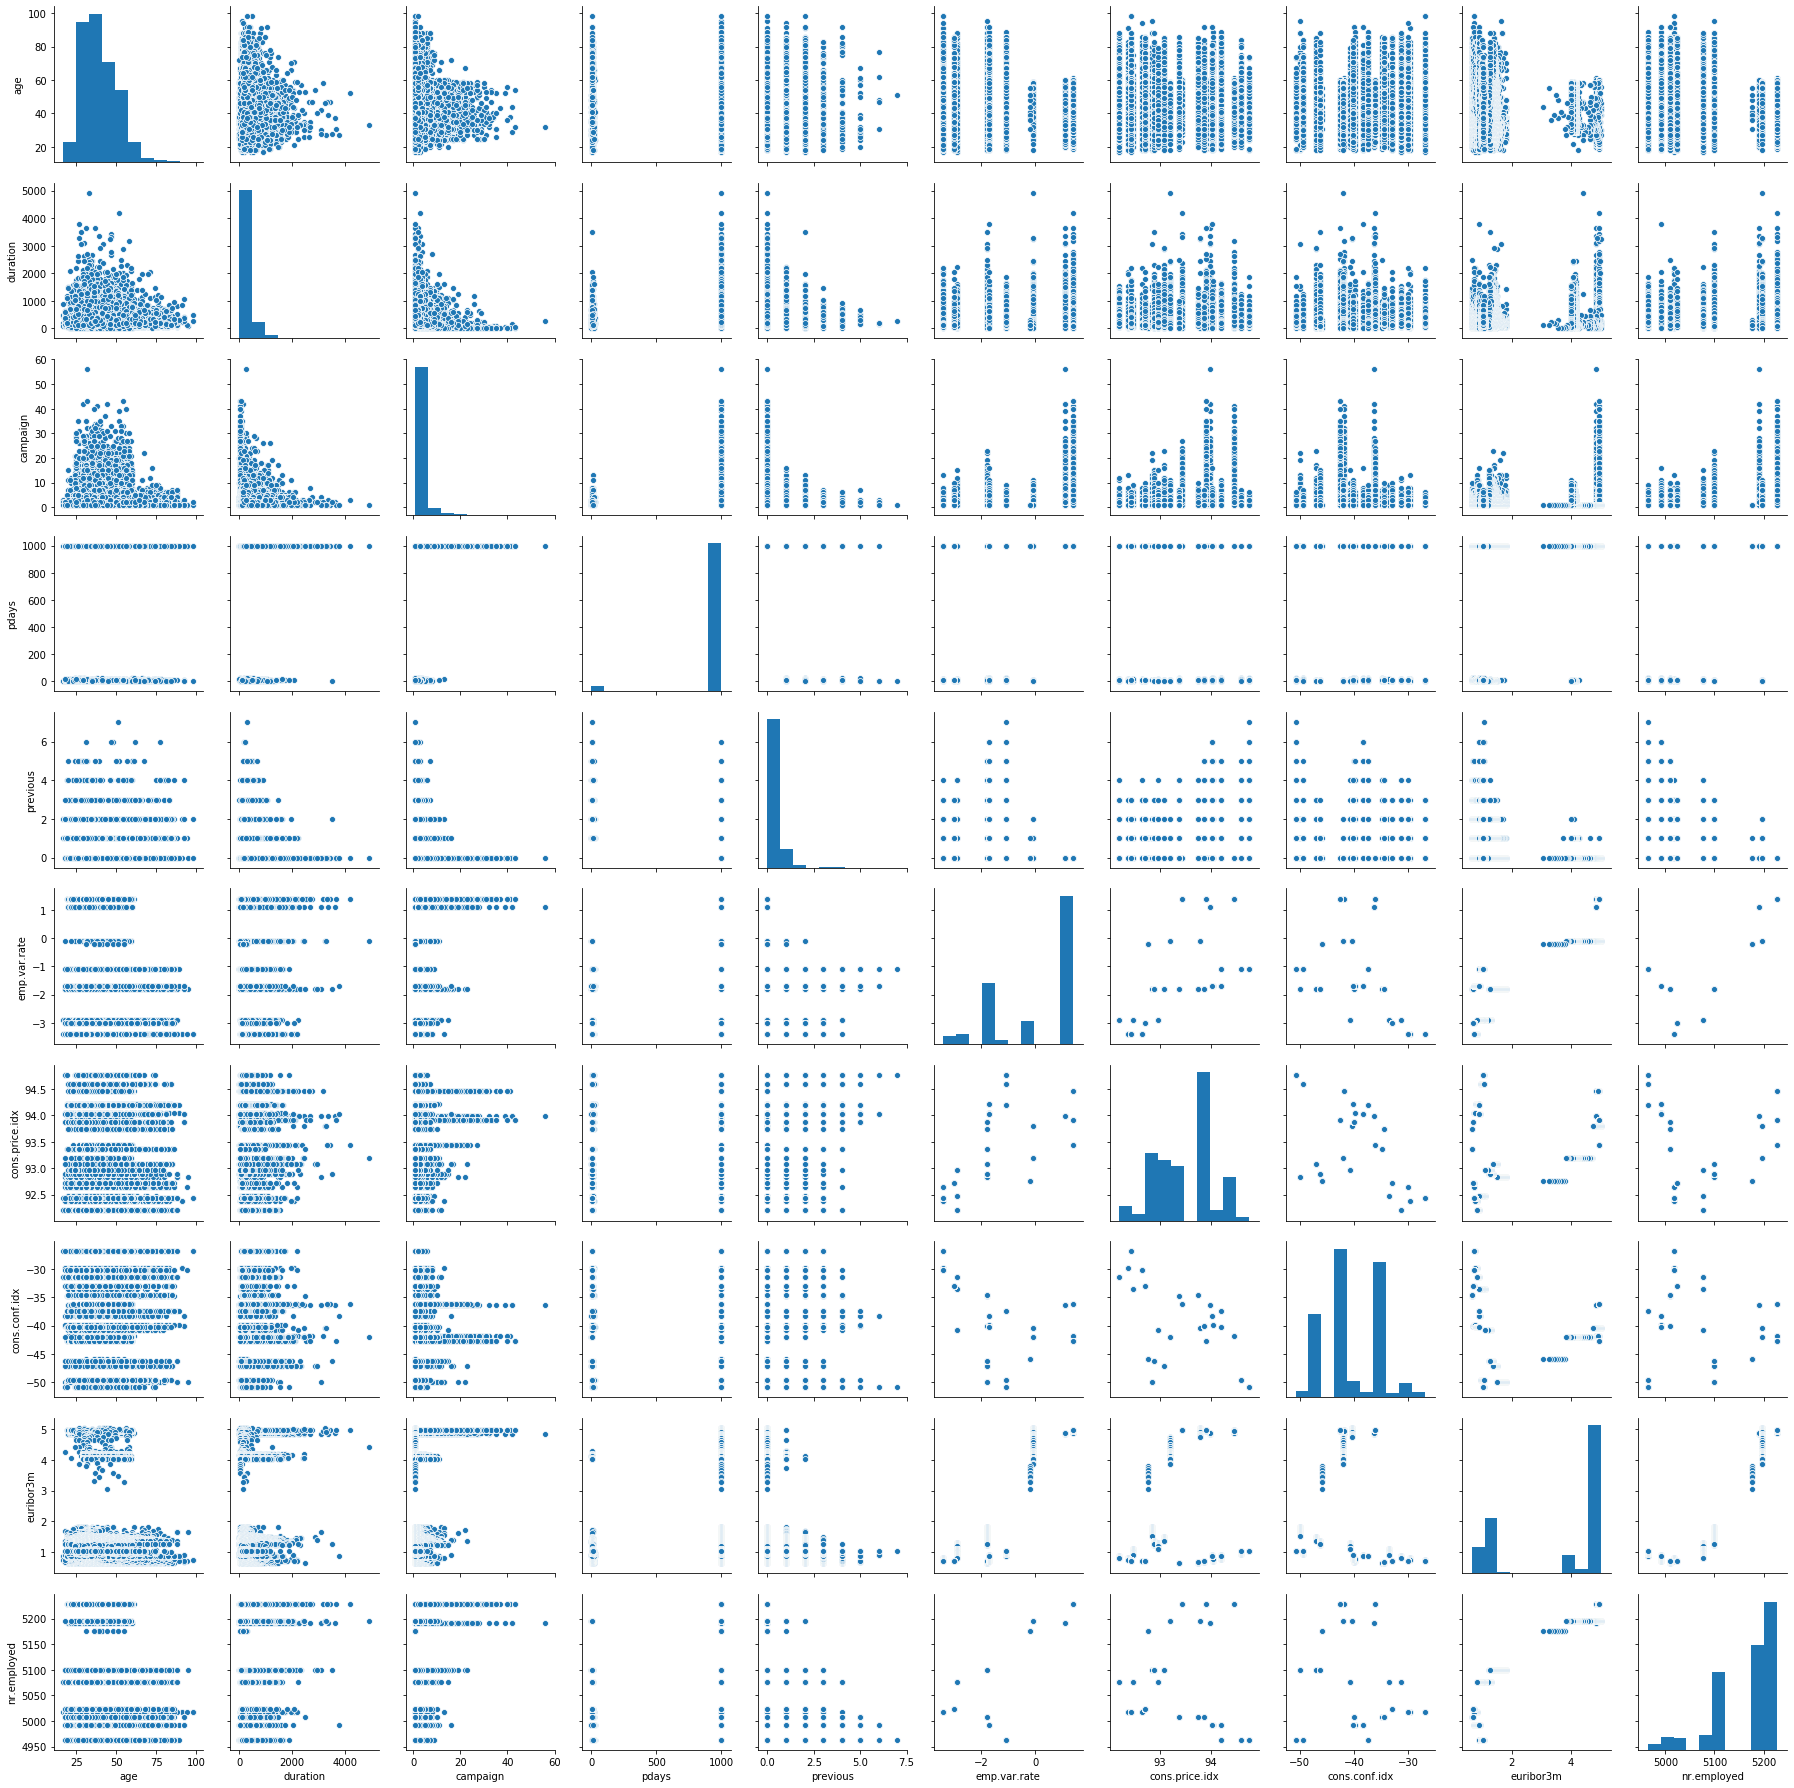

In [56]:
plt.figure(figsize=(18,9))
sns.pairplot(data)
plt.show()

### Data Preprocessing.

In [57]:
data.iloc[:,10:]

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
hi = {'no':0,'yes':1}
data['y']= data['y'].map(hi)

In [59]:
df = pd.get_dummies(data['marital'],drop_first=True)
dff = pd.get_dummies(data['default'],drop_first=True)
dfff = pd.get_dummies(data['housing'],drop_first=True)
dffff = pd.get_dummies(data['loan'],drop_first=True)
df1 = pd.get_dummies(data['poutcome'],drop_first=True)

In [60]:
data1 = pd.concat([df,dff,dfff,dffff,df1],axis=1)

In [61]:
data.set_index(data['month'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,,,,,,,,,,,,
may,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
may,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
may,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
may,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
may,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nov,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
nov,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
nov,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [62]:
data.drop(columns=['marital','education','job','default','loan','contact','day_of_week','poutcome'],inplace=True)

In [63]:
data.drop(columns=['housing'],inplace=True)

In [64]:
df = pd.concat([data1,data],axis=1)

In [65]:
df.iloc[:,10:]

,success,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,may,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,57,may,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,37,may,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,40,may,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,56,may,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,73,nov,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,0,46,nov,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,0,56,nov,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,0,44,nov,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [66]:
df.drop(columns=['month'],inplace=True)

In [67]:
x = df.drop(columns=['y']).to_numpy()
y = df['y'].to_numpy()

In [68]:
x.shape,y.shape

((41188, 21), (41188,))

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0,stratify=y,train_size=0.80)

In [71]:
x_train.shape,y_train.shape

((32950, 21), (32950,))

In [72]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

3712
29238


In [73]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [74]:
sm = SMOTE(sampling_strategy=1,random_state=0,k_neighbors=5,n_jobs=-1)

In [75]:
x_train_res,y_train_res = sm.fit_sample(x_train,y_train.ravel())

In [76]:
x_train_res.shape,y_train_res.shape

((58476, 21), (58476,))

In [77]:
print(len(y_train_res[y_train_res==1]))
print(len(y_train_res[y_train_res==0]))

29238
29238


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
x_train_scalled=scaler.fit_transform(x_train_res) 
x_test_scalled =scaler.transform(x_test)

In [80]:
model = LogisticRegression()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test_scalled)
print('Accuarcy :',accuracy_score(y_test,y_pred))

Accuarcy : 0.7078174314153921


In [81]:
mat= confusion_matrix(y_test,y_pred)
mat

array([[5207, 2103],
       [ 304,  624]], dtype=int64)

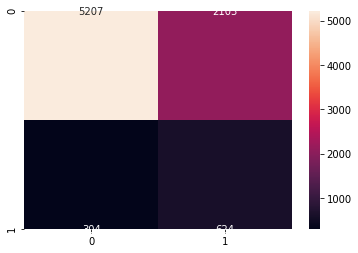

In [82]:
sns.heatmap(mat,annot=True,fmt='d')
plt.show()

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      7310
           1       0.23      0.67      0.34       928

    accuracy                           0.71      8238
   macro avg       0.59      0.69      0.58      8238
weighted avg       0.86      0.71      0.76      8238



### Feature Selection By the Correlation.

In [84]:
corr = np.abs(df.corr()['y'])
corr

married           0.043398
single            0.054133
unknown           0.005211
unknown           0.099293
yes               0.003041
unknown           0.002270
yes               0.011743
unknown           0.002270
yes               0.004466
nonexistent       0.193507
success           0.316269
age               0.030399
duration          0.405274
campaign          0.066357
pdays             0.324914
previous          0.230181
emp.var.rate      0.298334
cons.price.idx    0.136211
cons.conf.idx     0.054878
euribor3m         0.307771
nr.employed       0.354678
y                 1.000000
Name: y, dtype: float64

In [85]:
good_corr = corr[corr>0.3]
good_corr.drop(columns=['y'],inplace=True)

In [86]:
corrdata = df[good_corr.index]

In [87]:
corrdata.head()

,success,duration,pdays,euribor3m,nr.employed,y
0,0,261,999,4.857,5191.0,0
1,0,149,999,4.857,5191.0,0
2,0,226,999,4.857,5191.0,0
3,0,151,999,4.857,5191.0,0
4,0,307,999,4.857,5191.0,0


<Figure size 1080x576 with 0 Axes>

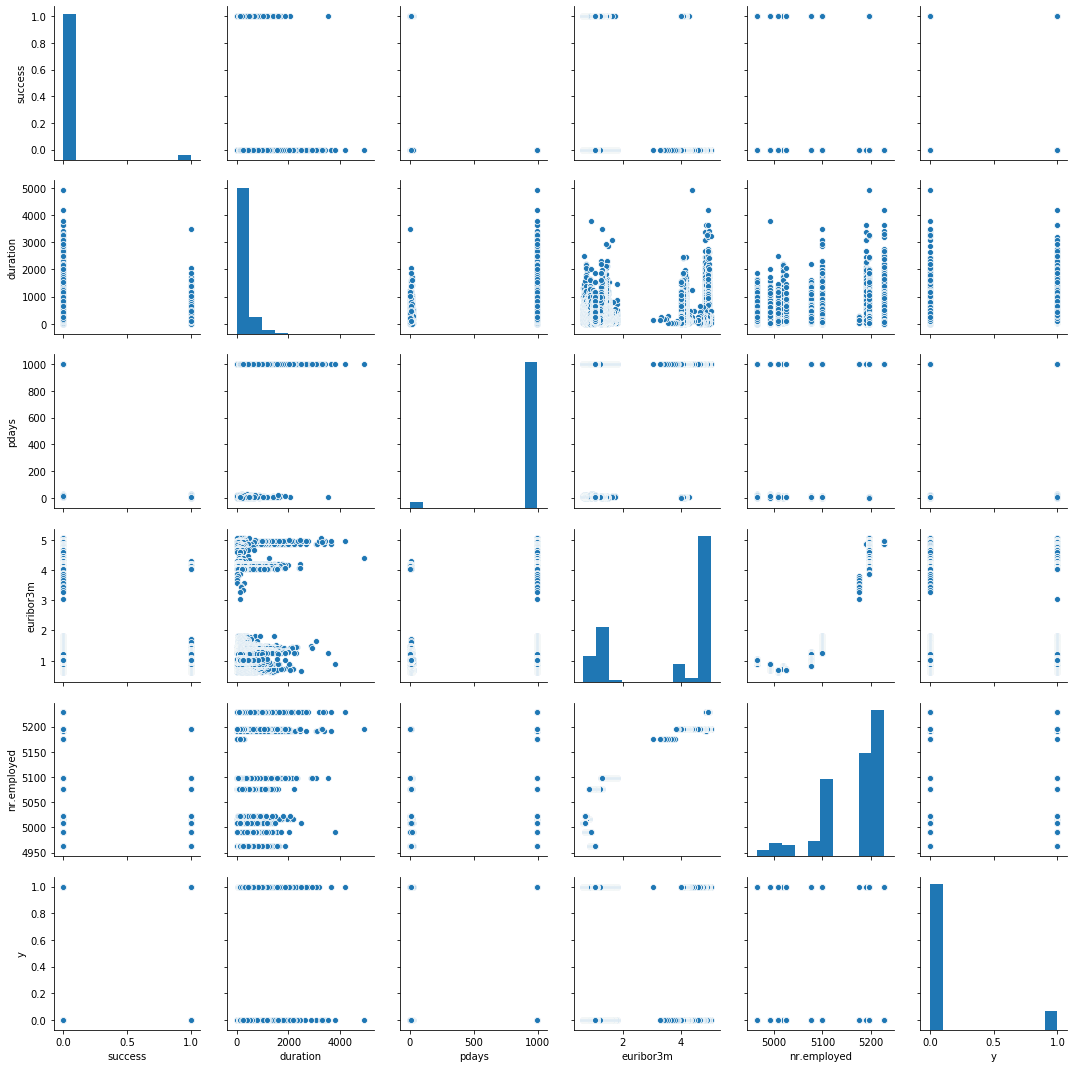

In [88]:
plt.figure(figsize=(15,8))
sns.pairplot(corrdata)
plt.show()

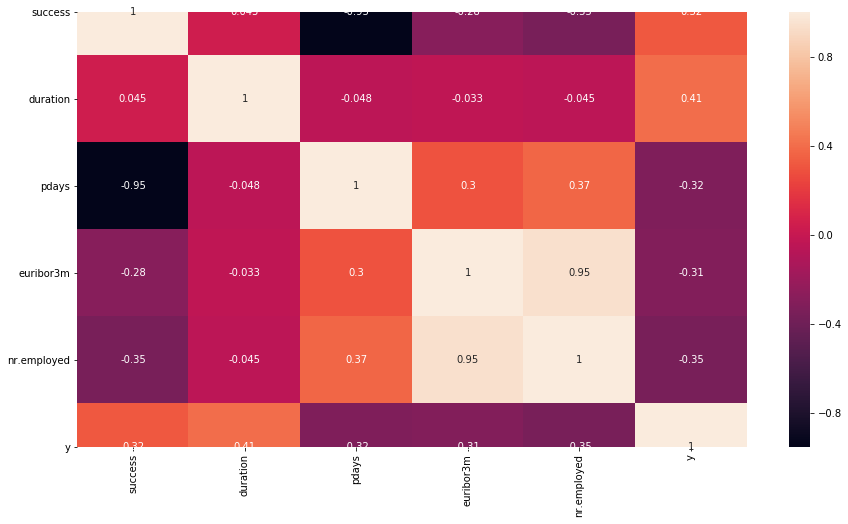

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(corrdata.corr(),annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [90]:
x = corrdata.drop(columns=['y'])
y = corrdata['y']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,stratify=y,random_state=42)

In [92]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.909686817188638


In [94]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[7152,  158],
       [ 586,  342]], dtype=int64)

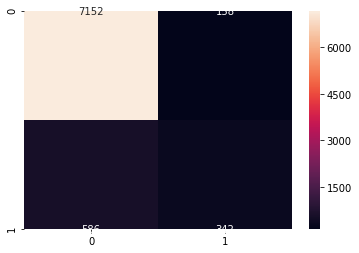

In [95]:
sns.heatmap(mat,annot=True,fmt='d')
plt.show()

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.68      0.37      0.48       928

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



In [97]:
datal = pd.DataFrame({'Actaul':y_test,'Predicted':y_pred})
datal

,Actaul,Predicted
14455,0,0
36380,0,0
40076,0,0
10778,0,0
27939,0,0
...,...,...
33359,1,1
34998,0,0
39861,0,1
3920,0,0
